## Setting Up:

In [1]:
import pandas as pd
import os
import warnings
from tqdm.notebook import tqdm
import zipfile
import cdsapi
import zipfile
import numpy as np
import glob
import xarray as xr

from scripts.config_NOR import *

warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

## Download monthly ERA5-Land variables:

In [2]:
RUN = True
if RUN:
    os.makedirs(path_ERA5_raw, exist_ok=True)
    c = cdsapi.Client()
    c.retrieve(
        'reanalysis-era5-land-monthly-means', {
            'product_type': ['monthly_averaged_reanalysis'],
            'variable': [
                '10m_u_component_of_wind',
                '10m_v_component_of_wind',
                '2m_temperature',
                'forecast_albedo',
                'snow_cover',
                'snow_density',
                'snow_depth_water_equivalent',
                'snowfall',
                'snowmelt',
                'surface_latent_heat_flux',
                'surface_net_thermal_radiation',
                'surface_sensible_heat_flux',
                'surface_solar_radiation_downwards',
                'total_precipitation',
            ],
            'year': [
                '1950',
                '1951',
                '1952',
                '1953',
                '1954',
                '1955',
                '1956',
                '1957',
                '1958',
                '1959',
                '1960',
                '1961',
                '1962',
                '1963',
                '1964',
                '1965',
                '1966',
                '1967',
                '1968',
                '1969',
                '1970',
                '1971',
                '1972',
                '1973',
                '1974',
                '1975',
                '1976',
                '1977',
                '1978',
                '1979',
                '1980',
                '1981',
                '1982',
                '1983',
                '1984',
                '1985',
                '1986',
                '1987',
                '1988',
                '1989',
                '1990',
                '1991',
                '1992',
                '1993',
                '1994',
                '1995',
                '1996',
                '1997',
                '1998',
                '1999',
                '2000',
                '2001',
                '2002',
                '2003',
                '2004',
                '2005',
                '2006',
                '2007',
                '2008',
                '2009',
                '2010',
                '2011',
                '2012',
                '2013',
                '2014',
                '2015',
                '2016',
                '2017',
                '2018',
                '2019',
                '2020',
                '2021',
                '2022',
                '2023',
                '2024',
            ],
            'month': [
                '01',
                '02',
                '03',
                '04',
                '05',
                '06',
                '07',
                '08',
                '09',
                '10',
                '11',
                '12',
            ],
            'time': ['00:00'],
            "data_format": "netcdf",
            "download_format": "zip",
            'area': [
                72,  # North latitude
                30,   # West longitude
                70,  # South latitude
                32,  # East longitude
            ],
        }, path_ERA5_raw+'download.netcdf.zip')
    with zipfile.ZipFile(path_ERA5_raw+'download.netcdf.zip', 'r') as zip:
        zip.extractall(path_ERA5_raw)
    c.retrieve("reanalysis-era5-single-levels", {
            "product_type": ["reanalysis"],
            "variable": ["geopotential"],
            "year": ["2024"],
            "month": ["06"],
            "day": ["01"],
            "time": ["12:00"],
            "data_format": "netcdf",
            "area": [
            72,  # North latitude
            30,   # West longitude
            70,  # South latitude
            32,  # East longitude
            ],
        }, path_ERA5_raw+'era5_geopotential_pressure.nc')


"""
            72,  # North latitude
            4,   # West longitude
            57,  # South latitude
            32,  # East longitude
"""

2025-05-06 12:12:16,868 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-06 12:12:16,869 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-05-06 12:12:17,287 INFO Request ID is 16755006-e704-4461-bf08-02c70e878835
2025-05-06 12:12:17,340 INFO status has been updated to accepted
2025-05-06 12:28:36,627 INFO status has been updated to successful


d5fcfd7224f245345a1f737a0123ccd.zip:   0%|          | 0.00/2.14M [00:00<?, ?B/s]

2025-05-06 12:28:37,487 INFO Request ID is bea2044a-bf39-4f42-9691-e57fe0ef0875
2025-05-06 12:28:37,538 INFO status has been updated to accepted
2025-05-06 12:28:51,406 INFO status has been updated to running
2025-05-06 12:28:59,038 INFO status has been updated to successful


d642e62efc4b8726d9f7e4873526473d.nc:   0%|          | 0.00/25.0k [00:00<?, ?B/s]

'\n            72,  # North latitude\n            4,   # West longitude\n            57,  # South latitude\n            32,  # East longitude\n'

In [3]:
! ls '/home/mburlet/scratch/data/DATA_MB/WGMS/Norway/ERA5Land/raw/'

data_stream-moda.nc  download.netcdf.zip  era5_geopotential_pressure.nc


In [4]:
xr.open_dataset(path_ERA5_raw+'data_stream-moda.nc')

<xarray.Dataset> Size: 22MB
Dimensions:     (valid_time: 900, latitude: 21, longitude: 21)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 7kB 1950-01-01 ... 2024-12-01
  * latitude    (latitude) float64 168B 72.0 71.9 71.8 71.7 ... 70.2 70.1 70.0
  * longitude   (longitude) float64 168B 30.0 30.1 30.2 30.3 ... 31.8 31.9 32.0
    expver      (valid_time) <U4 14kB ...
Data variables: (12/14)
    u10         (valid_time, latitude, longitude) float32 2MB ...
    v10         (valid_time, latitude, longitude) float32 2MB ...
    t2m         (valid_time, latitude, longitude) float32 2MB ...
    fal         (valid_time, latitude, longitude) float32 2MB ...
    snowc       (valid_time, latitude, longitude) float32 2MB ...
    rsn         (valid_time, latitude, longitude) float32 2MB ...
    ...          ...
    smlt        (valid_time, latitude, longitude) float32 2MB ...
    slhf        (valid_time, latitude, longitude) float32 2MB ...
    str         (valid_time, latitude, longitude) float32 2MB ...
    sshf        (valid_time, latitude, longitude) float32 2MB ...
    ssrd        (valid_time, latitude, longitude) float32 2MB ...
    tp          (valid_time, latitude, longitude) float32 2MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-05-06T11:38 GRIB to CDM+CF via cfgrib-0.9.1...

In [17]:
dcs = []
for path in glob.glob(path_ERA5_raw+'*.nc'):
    dcs.append(xr.open_dataset(path))

In [18]:
coordsVar = []
dataVar = []
for dc in dcs:
    coordsVar += list(dc.coords)
    dataVar += list(dc.data_vars)
coordsVar = np.unique(coordsVar).tolist()
dataVar = np.unique(dataVar).tolist()
print(f"{coordsVar=}")
print(f"{dataVar=}")

coords = {k:[] for k in coordsVar}
dataTypes = {}
for dc in dcs:
    for k in dc.coords:
        if len(dc[k].shape)>0:
            coords[k] +=  list(dc[k].values)
    for k in dc.data_vars:
        if k not in dataTypes:
            dataTypes[k] = dc[k].dtype
coords = {k: np.sort(np.unique(np.array(coords[k]))) for k in coords}

coordsVar=['expver', 'latitude', 'longitude', 'number', 'valid_time']
dataVar=['fal', 'rsn', 'sd', 'sf', 'slhf', 'smlt', 'snowc', 'sshf', 'ssrd', 'str', 't2m', 'tp', 'u10', 'v10', 'z']


In [19]:
discardVar = ['expver']

size = tuple(len(coords[k]) for k in coords if len(coords[k])>0)
print(f"{size=}")
dims = tuple(k for k in coords if len(coords[k])>0 and k not in discardVar)
print(f"{dims=}")
data = {}
for k in dataVar:
    data[k] = np.zeros(size, dtype=dataTypes[k])

size=(1, 28, 28, 901)
dims=('latitude', 'longitude', 'valid_time')


In [ ]:
for e, dc in enumerate(dcs):
    print(f"Processing datacube n°{e} / {len(dcs)}")
    for k in tqdm(dc.data_vars):
        idx = []
        selVar = []
        for c in dims+tuple(discardVar):
            if len(dc[c].shape)>0 and c not in discardVar:
                s = list(dc[c].values)
                sorter = np.argsort(coords[c])
                tmp = sorter[np.searchsorted(coords[c], s, sorter=sorter)]
                idx.append(tmp)
            elif c in discardVar:
                # Handle scalar (0-d array) properly
                if len(dc[c].shape) == 0:  # It's a scalar
                    s = [dc[c].values.item()]  # Convert scalar to a list with one item
                else:
                    s = list(dc[c].values)
                sorter = np.argsort(coords[c])
                tmp = sorter[np.searchsorted(coords[c], s, sorter=sorter)]
                selVar.append(tmp)
        assert len(selVar)==1
        for v in selVar[0]:
            data[k][v][idx[0],:,:][:,idx[1],:][:,:,idx[2]] = dc[k].data.transpose((1,2,0))


Processing datacube n°0 / 3


  0%|          | 0/14 [00:00<?, ?it/s]

Shape of target array: (21, 21, 900)
Shape of source data: (21, 21, 900)
Shape of target array: (21, 21, 900)
Shape of source data: (21, 21, 900)
Shape of target array: (21, 21, 900)
Shape of source data: (21, 21, 900)
Shape of target array: (21, 21, 900)
Shape of source data: (21, 21, 900)
Shape of target array: (21, 21, 900)
Shape of source data: (21, 21, 900)
Shape of target array: (21, 21, 900)
Shape of source data: (21, 21, 900)
Shape of target array: (21, 21, 900)
Shape of source data: (21, 21, 900)
Shape of target array: (21, 21, 900)
Shape of source data: (21, 21, 900)
Shape of target array: (21, 21, 900)
Shape of source data: (21, 21, 900)
Shape of target array: (21, 21, 900)
Shape of source data: (21, 21, 900)
Shape of target array: (21, 21, 900)
Shape of source data: (21, 21, 900)
Shape of target array: (21, 21, 900)
Shape of source data: (21, 21, 900)
Shape of target array: (21, 21, 900)
Shape of source data: (21, 21, 900)
Shape of target array: (21, 21, 900)
Shape of sourc

  0%|          | 0/15 [00:00<?, ?it/s]

Shape of target array: (28, 28, 901)


ValueError: axes don't match array

In [13]:
ds = xr.Dataset(
    {k: (tuple(discardVar)+dims, data[k]) for k in data},
    coords=coords
)
ds.to_netcdf(path_ERA5_raw+"era5_monthly_averaged_data.nc")

In [15]:
xr.open_dataset(path_ERA5_raw+'era5_monthly_averaged_data.nc')

<xarray.Dataset> Size: 42MB
Dimensions:     (expver: 1, latitude: 28, longitude: 28, valid_time: 901,
                 number: 0)
Coordinates:
  * expver      (expver) <U4 16B '0001'
  * latitude    (latitude) float64 224B 70.0 70.1 70.2 70.25 ... 71.8 71.9 72.0
  * longitude   (longitude) float64 224B 30.0 30.1 30.2 30.25 ... 31.8 31.9 32.0
  * number      (number) float64 0B 
  * valid_time  (valid_time) datetime64[ns] 7kB 1950-01-01 ... 2024-12-01
Data variables: (12/15)
    fal         (expver, latitude, longitude, valid_time) float32 3MB ...
    rsn         (expver, latitude, longitude, valid_time) float32 3MB ...
    sd          (expver, latitude, longitude, valid_time) float32 3MB ...
    sf          (expver, latitude, longitude, valid_time) float32 3MB ...
    slhf        (expver, latitude, longitude, valid_time) float32 3MB ...
    smlt        (expver, latitude, longitude, valid_time) float32 3MB ...
    ...          ...
    str         (expver, latitude, longitude, valid_time) float32 3MB ...
    t2m         (expver, latitude, longitude, valid_time) float32 3MB ...
    tp          (expver, latitude, longitude, valid_time) float32 3MB ...
    u10         (expver, latitude, longitude, valid_time) float32 3MB ...
    v10         (expver, latitude, longitude, valid_time) float32 3MB ...
    z           (expver, latitude, longitude, valid_time) float32 3MB ...

Dataset dimensions: FrozenMappingWarningOnValuesAccess({'expver': 1, 'latitude': 28, 'longitude': 28, 'valid_time': 901, 'number': 0})
Dataset coordinates: ['expver', 'latitude', 'longitude', 'number', 'valid_time']
Total variables: 15
Time range: 1950-01-01T00:00:00.000000000 to 2024-12-01T00:00:00.000000000
Spatial extent: lat 70.0 to 72.0, lon 30.0 to 32.0

Missing values check:
fal: 0 missing values (0.00%)
rsn: 0 missing values (0.00%)
sd: 0 missing values (0.00%)
sf: 0 missing values (0.00%)
slhf: 0 missing values (0.00%)
smlt: 0 missing values (0.00%)
snowc: 0 missing values (0.00%)
sshf: 0 missing values (0.00%)
ssrd: 0 missing values (0.00%)
str: 0 missing values (0.00%)
t2m: 0 missing values (0.00%)
tp: 0 missing values (0.00%)
u10: 0 missing values (0.00%)
v10: 0 missing values (0.00%)
z: 0 missing values (0.00%)

Value ranges for key variables:
tp (m/month): range [0.00, 0.00], expected [0, 1]
sd (m): range [0.00, 0.00], expected [0, 10]
sf (m/month): range [0.00, 0.00], ex

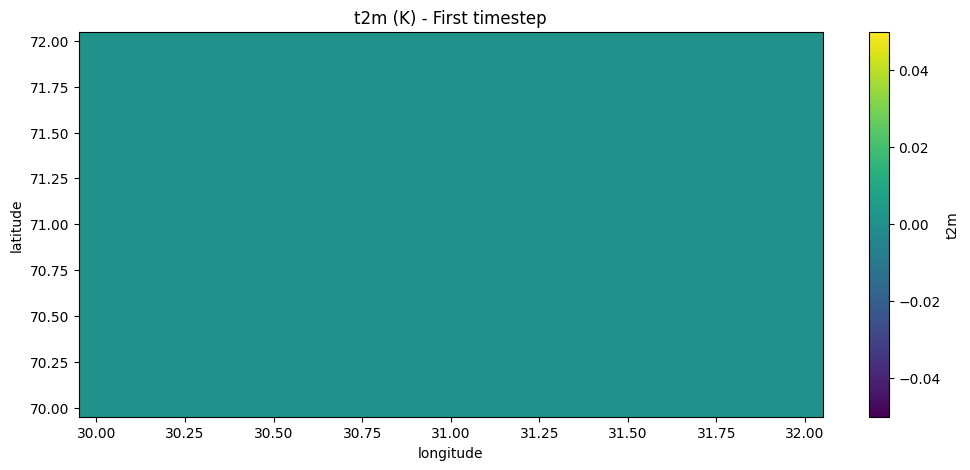


Checking for unusual temporal patterns...
t2m max month-to-month change: 0.00
tp max month-to-month change: 0.00


In [16]:
# 1. Check basic dataset properties
ds = xr.open_dataset(path_ERA5_raw+'era5_monthly_averaged_data.nc')
print(f"Dataset dimensions: {ds.dims}")
print(f"Dataset coordinates: {list(ds.coords)}")
print(f"Total variables: {len(ds.data_vars)}")
print(f"Time range: {ds.valid_time.values.min()} to {ds.valid_time.values.max()}")
print(f"Spatial extent: lat {ds.latitude.min().values} to {ds.latitude.max().values}, lon {ds.longitude.min().values} to {ds.longitude.max().values}")

# 2. Check for missing values in each variable
print("\nMissing values check:")
for var_name in ds.data_vars:
    missing = ds[var_name].isnull().sum().values
    total = ds[var_name].size
    print(f"{var_name}: {missing} missing values ({missing/total*100:.2f}%)")

# 3. Check value ranges for key variables
print("\nValue ranges for key variables:")
key_vars = {
    '2t': {'min': 200, 'max': 320, 'unit': 'K'},              # 2m temperature
    'tp': {'min': 0, 'max': 1, 'unit': 'm/month'},           # Total precipitation
    'sd': {'min': 0, 'max': 10, 'unit': 'm'},                # Snow depth
    'sf': {'min': 0, 'max': 1, 'unit': 'm/month'},           # Snowfall
    'fal': {'min': 0, 'max': 1, 'unit': '(0-1)'},            # Forecast albedo
    'str': {'min': 100, 'max': 500, 'unit': 'W/m^2'},        # Surface thermal radiation
    'ssrd': {'min': 0, 'max': 400, 'unit': 'W/m^2'},         # Surface solar radiation
}

# Try both standard name and the full ERA5-Land name variants
for var_key, expected in key_vars.items():
    # Check for different possible naming variants
    for possible_var in [var_key, 
                         var_key + 'm', 
                         '2m_temperature' if var_key == '2t' else None,
                         'snow_depth_water_equivalent' if var_key == 'sd' else None,
                         'snowfall' if var_key == 'sf' else None,
                         'forecast_albedo' if var_key == 'fal' else None,
                         'total_precipitation' if var_key == 'tp' else None,
                         'surface_net_thermal_radiation' if var_key == 'str' else None,
                         'surface_solar_radiation_downwards' if var_key == 'ssrd' else None]:
        if possible_var is not None and possible_var in ds:
            actual_min = float(ds[possible_var].min().values)
            actual_max = float(ds[possible_var].max().values)
            print(f"{possible_var} ({expected['unit']}): range [{actual_min:.2f}, {actual_max:.2f}], expected [{expected['min']}, {expected['max']}]")
            
            # Flag suspicious values
            if actual_min < expected['min'] or actual_max > expected['max']:
                print(f"  ⚠️ WARNING: {possible_var} has values outside expected range!")

# 4. Check temporal completeness
months_per_year = ds.valid_time.groupby('valid_time.year').count().values
print(f"\nMonthly coverage by year: min={months_per_year.min()}, max={months_per_year.max()}, complete years={np.sum(months_per_year == 12)}")

# 5. Visual check - plot a quick heatmap of a key variable
import matplotlib.pyplot as plt

print("\nGenerating sample visualization...")
plt.figure(figsize=(12, 5))

# Try to find temperature variable
temp_candidates = ['2t', '2m_temperature', 't2m']
temp_var = next((var for var in temp_candidates if var in ds), list(ds.data_vars)[0])

ds[temp_var].isel(valid_time=0, expver=0).plot(cmap='viridis')
plt.title(f'{temp_var} (K) - First timestep')
plt.show()

# 6. Check for unrealistic temporal jumps (potential data issues)
print("\nChecking for unusual temporal patterns...")
for var_candidates in [['2t', '2m_temperature', 't2m'], ['tp', 'total_precipitation']]:
    var = next((v for v in var_candidates if v in ds), None)
    if var:
        # Calculate month-to-month changes
        temporal_diff = ds[var].diff(dim='valid_time')
        extreme_change = float(abs(temporal_diff).max().values)
        print(f"{var} max month-to-month change: {extreme_change:.2f}")
        if extreme_change > (5 * temporal_diff.std().values):
            print(f"  ⚠️ WARNING: {var} shows potentially unrealistic temporal jumps!")

In [12]:
! ls '/home/mburlet/scratch/data/DATA_MB/WGMS/Norway/ERA5Land/raw/'

data_stream-moda.nc  era5_geopotential_pressure.nc
download.netcdf.zip  era5_monthly_averaged_data.nc


In [13]:
xr.open_dataset(path_ERA5_raw+'era5_monthly_averaged_data.nc')

<xarray.Dataset> Size: 81GB
Dimensions:     (expver: 1, latitude: 870, longitude: 1718, valid_time: 901,
                 number: 0)
Coordinates:
  * expver      (expver) <U4 16B '0001'
  * latitude    (latitude) float64 7kB -90.0 -89.75 -89.5 ... 89.5 89.75 90.0
  * longitude   (longitude) float64 14kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * number      (number) float64 0B 
  * valid_time  (valid_time) datetime64[ns] 7kB 1950-01-01 ... 2024-12-01
Data variables: (12/15)
    fal         (expver, latitude, longitude, valid_time) float32 5GB ...
    rsn         (expver, latitude, longitude, valid_time) float32 5GB ...
    sd          (expver, latitude, longitude, valid_time) float32 5GB ...
    sf          (expver, latitude, longitude, valid_time) float32 5GB ...
    slhf        (expver, latitude, longitude, valid_time) float32 5GB ...
    smlt        (expver, latitude, longitude, valid_time) float32 5GB ...
    ...          ...
    str         (expver, latitude, longitude, valid_time) float32 5GB ...
    t2m         (expver, latitude, longitude, valid_time) float32 5GB ...
    tp          (expver, latitude, longitude, valid_time) float32 5GB ...
    u10         (expver, latitude, longitude, valid_time) float32 5GB ...
    v10         (expver, latitude, longitude, valid_time) float32 5GB ...
    z           (expver, latitude, longitude, valid_time) float32 5GB ...

In [16]:
# Check if geopotential has actual values
print(f"Z variable has non-zero values: {np.any(ds['tp'] != 0)}")
print(f"Z variable min/max: {ds['tp'].min().values}, {ds['tp'].max().values}")

Z variable has non-zero values: <xarray.DataArray 'tp' ()> Size: 1B
array(False)
Z variable min/max: 0.0, 0.0
